In [65]:
import pandas as pd 
import numpy as np

#Authentication module. for documentation  (http://docs.tweepy.org)
import tweepy as tp

#import nltk module 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


#import reguler expression 
import re

#import textblob 
from textblob import TextBlob

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Description

In [66]:
df = pd.read_csv('tweets.csv')
df.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,@united yes. We waited in line for almost an h...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN


In [67]:
df.shape

(14485, 15)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 15 columns):
tweet_id                        14485 non-null int64
airline_sentiment               14485 non-null object
airline_sentiment_confidence    14485 non-null float64
negativereason                  9082 non-null object
negativereason_confidence       10416 non-null float64
airline                         14485 non-null object
airline_sentiment_gold          40 non-null object
name                            14485 non-null object
negativereason_gold             32 non-null object
retweet_count                   14485 non-null int64
text                            14485 non-null object
tweet_coord                     1007 non-null object
tweet_created                   14485 non-null object
tweet_location                  9798 non-null object
user_timezone                   9710 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


The dataset is contain of 14.485 records and 15 features like 
- **tweet_id** : ID of twitter users 
- **airline_sentiment** : sentiment analysis of tweets
- **airline_sentiment_confidence** : confidence interval of sentiment analysis of tweets
- **negativereason** : a phrase that make a tweet become negative value
- **negativereason_confidence** : confidence interval of negativereason feature
- **airline**: name of airline company
- **name**: type of airline
- **retweet count** : sum of retweet for every tweets
- **text** : tweets

We want to drop **airline_sentiment_gold , negativereason_gold, tweet_coord, tweet_created, tweet_location, user_timezone.** feature from the dataset.



In [0]:
df=df.drop(columns=['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'tweet_created', 'tweet_location','user_timezone'])

Next, it needed to drop the duplicate tweets to make a clean data tweets

In [0]:
#dropo duplicate tweet 
g_unique = set()
for item in df['text']:
        g_unique.add(item) # ensures the element will only be copied if not already in the set
tweet = []
for item in g_unique:
    tweet.append(item)
    dataframe = pd.DataFrame(tweet,columns = ['text'])

In [71]:
dataframe.head()

,text
0,@JetBlue I'm also a mosaic customer and fly je...
1,@SouthwestAir any official word whether flight...
2,What can I say other than when it comes to my ...
3,@VirginAmerica Thank you!!
4,"@JetBlue got txt 40min after sched dpt, sayin..."


### Preprocessing Data

Data tweet need to do the preprocessing by many technique preprocess data.

#### Lower casing

In [72]:
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dataframe['text'].head()

0    @jetblue i'm also a mosaic customer and fly je...
1    @southwestair any official word whether flight...
2    what can i say other than when it comes to my ...
3                           @virginamerica thank you!!
4    @jetblue got txt 40min after sched dpt, saying...
Name: text, dtype: object

#### Punctuation Removal
This preprocessing data want to remove the punctuation character.

In [73]:
dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')
dataframe.head()

,text
0,jetblue im also a mosaic customer and fly jet ...
1,southwestair any official word whether flight ...
2,what can i say other than when it comes to my ...
3,virginamerica thank you
4,jetblue got txt 40min after sched dpt saying p...


#### Stopword Removal
This preprocessing data want to remove the stopword in the tweets.

In [74]:
stop = stopwords.words('english')
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dataframe['text'].head(10)

0    jetblue im also mosaic customer fly jet blue alot
1    southwestair official word whether flight 3403...
2    say comes brandloveaffair w jetblue ur souland...
3                                  virginamerica thank
4    jetblue got txt 40min sched dpt saying plane a...
5    united thanks able app still customer service ...
6    southwestair save mile visit family 2015 impac...
7    united really culture problem everyone tried w...
8                americanair lost basket ballbag plane
9    usairways thanks getting back called number ea...
Name: text, dtype: object

#### Frequents Word Removal
Remove the word that exist in all tweets.

In [75]:
freq = pd.Series(' '.join(dataframe['text']).split()).value_counts()[:10]
freq

united          4125
flight          3823
usairways       3036
americanair     2791
southwestair    2440
jetblue         2349
get             1326
cancelled       1034
thanks          1030
service          948
dtype: int64

In [76]:
freq = list(freq.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0            im also mosaic customer fly jet blue alot
1    official word whether 3403 bwi manchester flig...
2    say comes brandloveaffair w ur soulandinspirat...
3                                  virginamerica thank
4    got txt 40min sched dpt saying plane arrived j...
Name: text, dtype: object

#### Rare Words Removal
Remove the words that indicate as a strange word.

In [77]:
rare_word = pd.Series(' '.join(dataframe['text']).split()).value_counts()[-10:]
rare_word

nycgtpghwish      1
untrained         1
organizational    1
xm                1
jeffsmisek        1
ua3417            1
4011              1
eternal           1
phxphl            1
programming       1
dtype: int64

In [78]:
rare_word = list(rare_word.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0            im also mosaic customer fly jet blue alot
1    official word whether 3403 bwi manchester flig...
2    say comes brandloveaffair w ur soulandinspirat...
3                                  virginamerica thank
4    got txt 40min sched dpt saying plane arrived j...
Name: text, dtype: object

#### Spelling Correction 
repair the typo word

In [79]:
#Spelling correction
dataframe['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0            in also mosaic customer fly jet blue clot
1    official word whether 3403 i manchester lighte...
2    say comes brandloveaffair w or soulandinspirat...
3                                  virginamerica thank
4    got txt min shed apt saying plane arrived of l...
Name: text, dtype: object

#### Tokenization
split word in tweets

In [80]:
TextBlob(dataframe['text'][1]).words

WordList(['official', 'word', 'whether', '3403', 'bwi', 'manchester', 'flightled', 'ive', 'got', '8hr', 'drive', 'snow'])

#### Stemming
Make the word to the original word

In [0]:
st = PorterStemmer()
dataframe['text'] = dataframe['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#### Lematization
Make the word to the original word based in the dictionary.

In [82]:
from textblob import Word
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dataframe['text'].head()

0              im also mosaic custom fli jet blue alot
1    offici word whether 3403 bwi manchest flightl ...
2    say come brandloveaffair w ur soulandinspir ht...
3                                  virginamerica thank
4    got txt 40min sched dpt say plane arriv jfk la...
Name: text, dtype: object

## WordCloud Visualization

### Wordcloud Tweets

In [0]:
wordc = "".join(dataframe.text.values)

In [0]:
#make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

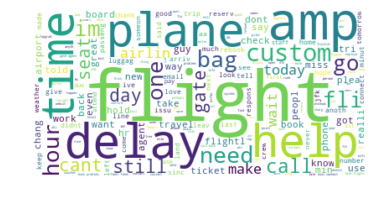

In [85]:
create_word_cloud(wordc)

based on the word cloud, we can see that word that have a high frequency in the tweets dataset is **flight, plane, delay, help, time, amp gate, bag, custom**, etc. Because that words have the bigger size in the wordcloud.

### WordCloud Negative Reason of Negative Sentiment

In [0]:
#positive = df.loc[df['airline_sentiment'] == "positive"]
negative  = df.loc[df['airline_sentiment'] == "negative"]
#neutral  = df.loc[df['airline_sentiment'] == "neutral"]

In [0]:
negative = "".join(negative.negativereason.values)

In [0]:
#make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

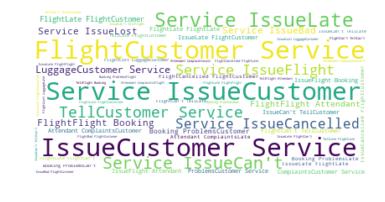

In [103]:
create_word_cloud(negative)

The most negative reason that mostly appear in the tweet dataset is
- FlighCustomer Service
- Service IssueCustomer
- IssueCustomer Service
- Service IssueLate
- Service IssueCancelled

It means that too much tweet that speak about that reason the tweet is categorized by customers.

## Exploratory Data Analysis

### Sentiment Analysis Visualization

In [86]:
sentiment =df [['airline_sentiment']]
sentiment.head()

,airline_sentiment
0,neutral
1,negative
2,negative
3,negative
4,negative


In [87]:
cs = sentiment['airline_sentiment'].value_counts()
cs

negative    9082
neutral     3069
positive    2334
Name: airline_sentiment, dtype: int64

<function matplotlib.pyplot.show>

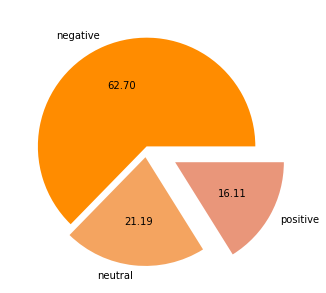

In [88]:
colors = ['darkorange', 'sandybrown', 'darksalmon']
explode = (0, 0.1, 0.3)

plt.figure(figsize=(5,5))
plt.pie(cs, labels=cs.index, autopct='%.2f',colors=colors,explode=explode)
plt.show

Based on the dataset, negative tweets is the higher value with 62,72% that means most of costumer airline make a tweet to share they dissapointed or a problem to tweets.

### Airline Company Visualization

In [90]:
airline =df [['airline']]
airline.head()

,airline
0,Delta
1,Delta
2,United
3,United
4,Southwest


In [91]:
bca = airline['airline'].value_counts()
bca

United            3822
US Airways        2913
American          2604
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

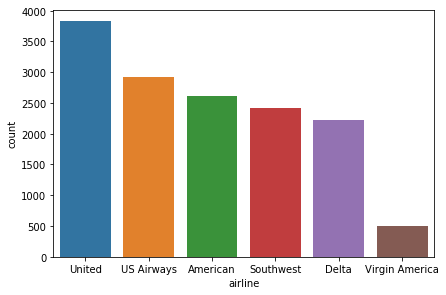

In [94]:
f=plt.figure(figsize=(15,10))
f.add_subplot(2,2,1)
sns.countplot(airline['airline'], order=airline['airline'].value_counts().index)

Based on the barchart we can see that United airline is the most topic that have a higher value of tweets.